<a href="https://colab.research.google.com/github/gabrielrigo1302/2022_projeto_01/blob/main/TCC_2_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploração


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal
from scipy import stats
import numpy as np
from statistics import mode, median, variance


# carregando o arquivo matlab (Exercício 1 do indivíduo 1);
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
emg_samples = mat['emg']
stimulus_samples = mat['stimulus']

# Entendendo melhor os dados

Segundo o própio NINAPRO:

O conjunto de dados inclui até 10 repetições de 49 movimentos manuais. Os sujeitos foram solicitados a pensar em repetir o mais naturalmente possível os movimentos que foram mostrados como filmes na tela de um laptop. O experimento é dividido em três exercícios:

1.   Movimentos básicos dos dedos.
2.   Agarrar e movimentos funcionais.
3.   Padrões de força.

*   Taxa de Amostragem dos sinais sEMG: 2KHz.
*   Duração da Repetição do Movimento: 5s.
*   Duração do Descanso: 3s

Baseado nisso é possível concluir:

São 2000 amostras por segundo (2KHz = 2000 vezes por segundo)
São 10000 amostras de movimento (2000 amostras/s * 5 segundos)
São 6000 amostras de descanso (2000 amostras/s * 3 segundos)

No caso 10000 de movimento seguidas de 6000 de descanso

In [3]:
# sample_items = mat.items()

In [4]:
# for key, value in sample_items:
#   if key == "subject":
#     print('Indivíduo: ', value);
#   if key == "exercise":
#     print('Exercício: ', value);

In [5]:
# for key, value in sample_items:
#   if key == "emg":
#   # print('key === ', key, '\nvalue === ', value)
#     print('Quantidade total de elementos === ', value.size)
#     print('Quantidade de elementos em cada dimensão === ', value.shape)
#     print('Tipo dos dados === ', value.dtype)
#     print('Número de dimensões === ', value.ndim)
#   # for v in value:
#   #   print('v === ', v)

# **IMPORTANTE**

A partir disso é possível concluir:

Nesse arquivo temos o:

1o movimento, do 1o indivíduo, repetido 10 vezes, com 101014 amostras por vez

In [6]:
for key in mat.keys():
  print("key == ", key)

key ==  __header__
key ==  __version__
key ==  __globals__
key ==  emg
key ==  stimulus
key ==  glove
key ==  subject
key ==  exercise
key ==  repetition
key ==  restimulus
key ==  rerepetition


In [7]:
print("TESTE == ", mat['glove'][0])

TESTE ==  [146. 121. 113. 128. 117.  95.  65.  97. 108.  75. 152. 110.  88.  69.
 148. 114. 116.  83. 140. 131. 135. 115.]


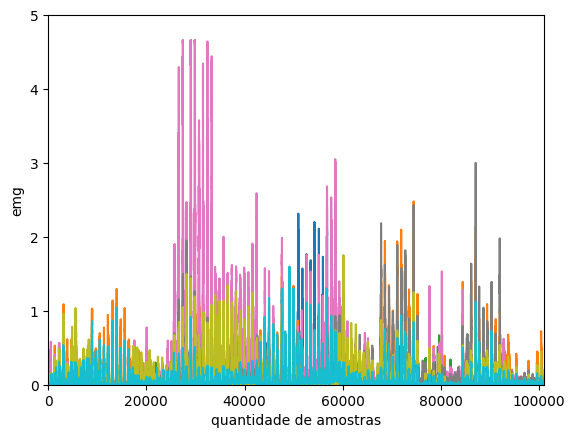

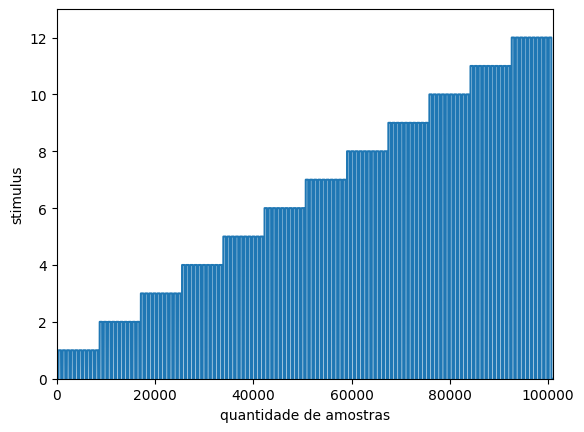

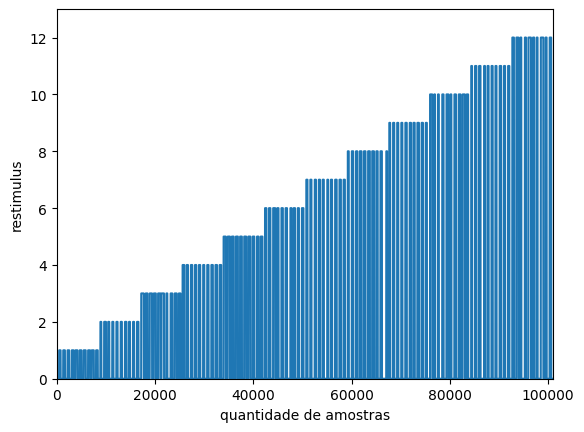

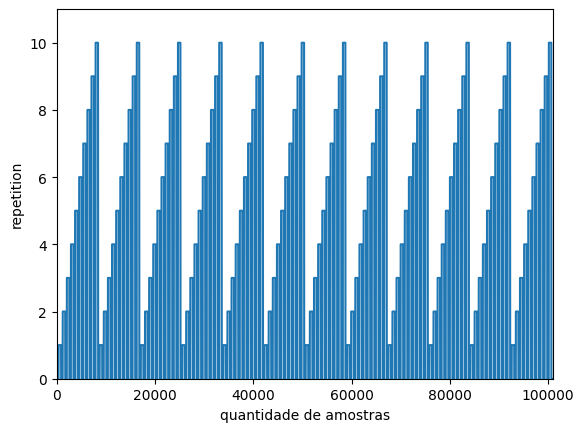

In [8]:
FIRST_SAMPLE = 0
LAST_SAMPLE = 101014

# Traçando os gráficos associados
# stimulus: apresenta o intervalo do movimento e qual o gesto/movimento (1 a 12)
# restimulus: apresenta o intervalo do movimento (com refinamento) e qual o movimento (1 a 12)
# repetition: apresenta a repetição (1 a 10) do movimento x (10 repetições do movimento 1, 10 repetições do movimento 2, etc)

for key in mat.keys():

    if key == 'emg':
        plt.figure()
        plt.plot(mat['emg'])
        plt.ylim(0, 5.0)
        plt.ylabel('emg')
        plt.xlabel('quantidade de amostras')
        plt.xlim(FIRST_SAMPLE, LAST_SAMPLE)

    if key == 'stimulus':
        plt.figure()
        plt.plot(mat['stimulus'])
        plt.ylim(0, 13.0)
        plt.ylabel('stimulus')
        plt.xlabel('quantidade de amostras')
        plt.xlim(FIRST_SAMPLE, LAST_SAMPLE)

    if key == 'restimulus':
        plt.figure()
        plt.plot(mat['restimulus'])
        plt.ylim(0, 13.0)
        plt.ylabel('restimulus')
        plt.xlabel('quantidade de amostras')
        plt.xlim(FIRST_SAMPLE, LAST_SAMPLE)

    if key == 'rerepetition':
        plt.figure()
        plt.plot(mat['repetition'])
        plt.ylim(0, 11.0)
        plt.ylabel('repetition')
        plt.xlabel('quantidade de amostras')
        plt.xlim(FIRST_SAMPLE, LAST_SAMPLE)


plt.show()



In [9]:
# # data = mat['emg']

# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'b', 'w'];

# for i in range(data.shape[1]):
#   plt.plot(data[:, i], label=f'Column {i+1}', color=colors[int(i/2)])
#   plt.xlabel('X-axis label')
#   plt.ylabel('Y-axis label')
#   plt.title('Plotting MATLAB data in Python')
#   plt.legend()
#   plt.show()

In [10]:
# # dados_emg = mat['emg']

# # Definir variáveis
# numero_amostras = dados_emg.shape[0]  # Quantidade total de elementos (1010140)
# numero_repeticoes = dados_emg.shape[1]  # Quantidade de repetições (10)

# # Criar array de índices das amostras
# indices_amostras = np.arange(numero_amostras)

# # Plotar as amostras em sequência
# for i in range(numero_repeticoes):
#     # Definir cor da repetição
#     cor = plt.cm.Spectral(i / numero_repeticoes)

#     # Plotar a repetição atual com pontos sem sobreposição
#     plt.scatter(indices_amostras + i * numero_amostras, dados_emg[:, i], s=1, alpha=0.7, color=cor, label=f'Repetição {i + 1}')

# # Ajustar escala do eixo X
# plt.xlim(0, numero_amostras)

# # Definir rótulos dos eixos
# plt.xlabel('Amostra')
# plt.ylabel('Valor EMG (μV)')

# # Adicionar legenda
# plt.legend(loc='best')

# # Ajustar tamanho da figura
# plt.figure(figsize=(50, 50))

# # Mostrar o gráfico
# plt.show()

In [11]:
# a = 101014/2000
# print('Tempo levado para buscar todas as amostras de uma repetição  === ', a)

In [12]:
# # Carregar os dados do arquivo .mat
# # dados_emg = mat['emg']

# # Definir variáveis
# numero_amostras = dados_emg.shape[0]  # Quantidade total de elementos (1010140)
# numero_repeticoes = dados_emg.shape[1]  # Quantidade de repetições (10)

# for i in range(numero_repeticoes):
#     # Definir a cor da repetição
#     cor = plt.cm.Spectral(i / numero_repeticoes)

#     # Plotar a repetição atual
#     plt.plot(dados_emg[:, i], color=cor, label=f'Repetição {i + 1}')

# # Definir rótulos dos eixos
# plt.xlabel('Amostra')
# plt.ylabel('Valor EMG (μV)')

# # Adicionar legenda
# plt.legend()

# # Mostrar o gráfico
# plt.show()

Filtro ButterWorth passa-baixa de primeira ordem,  com frequência de corte de 1Hz

Não parece estar funcionando corretamente

In [13]:
# # Definindo a frequência de corte em Hz
# cutoff_frequency = 1.0
# # Convertendo a frequência de corte para radianos por segundo
# # frequência de corte em radianos por segundo = 2 * PI * frequência de corte
# radians_cutoff_frequency = 2 * np.pi * cutoff_frequency

# # Criando a função de transferência do filtro passa-baixa de Butterworth de primeira ordem
# # H(s) = 1/[1+(s/2PI)] !Verificar

# numerator = [1]
# denominator = [1, radians_cutoff_frequency]

# b, a = signal.butter(1, 0.01, btype='low', analog=False) # Ajustar esses parâmetros

# dados_emg_filtrados = np.zeros_like(dados_emg)

# for i in range(numero_repeticoes):
#     dados_emg_filtrados[:, i] = signal.lfilter(b, a, dados_emg[:, i])

In [14]:
# plt.plot(dados_emg[:, 0], label='Sinal original')
# plt.xlabel('Amostras')
# plt.ylabel('Valor EMG (μV)')
# plt.legend()
# plt.title('Sinal EMG Original vs. Filtrado (1 Hz)')

# plt.plot(dados_emg_filtrados[:, 0], label='Sinal filtrado')
# plt.ylim(0, 2.5)
# plt.xlabel('Amostras')
# plt.ylabel('Valor EMG (μV)')
# plt.legend()
# plt.title('Sinal EMG Original vs. Filtrado (1 Hz)')

# plt.show()

# SEPARAÇÃO TESTE TREINO

avaliar se é melhor:

stimulus e repetição ou
restimulus e rerepetição

In [15]:
import random

In [16]:
def get_stimulus_ranges(samples, number_of_movements):
  response = [{
    'stimulus': 0,
    'first_index': 0,
    'last_index': 0,
    'repetitions': [],
  } for _ in range(number_of_movements)]

  previous_stimulus = samples[0]
  last_change_index = 0

  for sample_index in range(len(samples)):
    actual_stimulus = samples[sample_index][0]

    #validando se o próximo index não estoura o array
    if (sample_index + 1 < len(samples)):
      next_stimulus = samples[sample_index + 1][0]

      #valida se o stimulus atual é diferente do próximo e se o próximo é zero
      if (actual_stimulus != next_stimulus and next_stimulus == 0):
        #salva o index do  stimulus que vem antes de um stimulus 0
        last_change_index = sample_index

    if (actual_stimulus != previous_stimulus):

      if (actual_stimulus != 0):
        response[actual_stimulus-1]['stimulus'] = actual_stimulus
        response[actual_stimulus-1]['stimulus'] = actual_stimulus
        response[actual_stimulus-1]['first_index'] = sample_index
        previous_stimulus = actual_stimulus

      if (actual_stimulus > 1):
        response[actual_stimulus-2]['last_index'] = last_change_index

    if (sample_index + 1 == len(samples)):
      response[actual_stimulus-1]['last_index'] = last_change_index

  return response


In [17]:
#!APENAS PARA TESTE = Valida quais números tem entre cada um dos ranges
def test_get_stimulus_ranges(samples, ranges):
  matched_values = []
  stimulus_index = 0
  sample_index = ranges[0]['first_index']

  while (sample_index <= ranges[len(ranges) - 1]['last_index']):
    if  (ranges[stimulus_index]['last_index'] < sample_index):
      # print('last_index = ', sample_index-1)
      stimulus_index += 1
      sample_index = ranges[stimulus_index]['first_index']
      matched_values = []
      # print('first_index = ', sample_index)

    if (samples[sample_index] not in matched_values):
      # print(samples[sample_index])
      matched_values.append(samples[sample_index])

    else:
      sample_index += 1;

In [18]:
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
stimulus_samples = mat['stimulus']

stimulus_ranges = get_stimulus_ranges(stimulus_samples, 12)

# for stimulus_range in stimulus_ranges:
#   print(stimulus_range);



In [19]:
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
stimulus_samples = mat['stimulus']

stimulus_ranges = test_get_stimulus_ranges(stimulus_samples, stimulus_ranges)

In [20]:
def split_repetition (stimulus_ranges_splited, s_samples, r_samples, repetition_quantity, train_mock):
  repetitions_numbers = [index for index in range(repetition_quantity)]

  random_values = train_mock

  for stimulus_range in stimulus_ranges_splited:
    #Como é crescente só preciso armazenar o último valor
    last_matched_repetition = 0
    repetitions = [{
      'repetition': index + 1,
      'train': index in random_values,
      'first_index': 0,
      'last_index': 0
    } for index in range(repetition_quantity)]


    for index in range(int(stimulus_range['first_index']), len(s_samples)):
      if (stimulus_range['last_index'] < index):
        repetitions[int(r_samples[index])-1]['last_index'] = index - 1
        break

      elif (s_samples[index] !=0):
        if (r_samples[index] != last_matched_repetition):
          # repetition[]
          # print(s_samples[index], r_samples[index])
          last_matched_repetition = r_samples[index]
          repetitions[int(r_samples[index])-1]['first_index'] = index
          # print(repetitions[int(r_samples[index])-1])

        elif (r_samples[index+1] == 0):
          repetitions[int(r_samples[index])-1]['last_index'] = index


    stimulus_range['repetitions']=repetitions

  return stimulus_ranges_splited





In [21]:
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
stimulus_samples = mat['stimulus']
repetition_samples = mat['repetition']

stimulus_ranges = get_stimulus_ranges(stimulus_samples, 12)

stimulus_ranges_with_repetition = split_repetition(stimulus_ranges, stimulus_samples, repetition_samples, 10, [0, 2, 3, 5, 6, 8, 9])

for s in stimulus_ranges_with_repetition:
  print('stimulus == ', s['stimulus'])
  print('first_index == ', s['first_index'])
  print('last_index == ', s['last_index'])
  print()
  for r in s['repetitions']:
    print('r == ', r)
  print()

<ipython-input-20-cc8d8dd8c5bc>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['first_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index - 1


stimulus ==  1
first_index ==  333
last_index ==  8378

r ==  {'repetition': 1, 'train': True, 'first_index': 333, 'last_index': 848}
r ==  {'repetition': 2, 'train': False, 'first_index': 1169, 'last_index': 1684}
r ==  {'repetition': 3, 'train': True, 'first_index': 2009, 'last_index': 2525}
r ==  {'repetition': 4, 'train': True, 'first_index': 2846, 'last_index': 3357}
r ==  {'repetition': 5, 'train': False, 'first_index': 3682, 'last_index': 4197}
r ==  {'repetition': 6, 'train': True, 'first_index': 4518, 'last_index': 5029}
r ==  {'repetition': 7, 'train': True, 'first_index': 5351, 'last_index': 5866}
r ==  {'repetition': 8, 'train': False, 'first_index': 6195, 'last_index': 6706}
r ==  {'repetition': 9, 'train': True, 'first_index': 7027, 'last_index': 7542}
r ==  {'repetition': 10, 'train': True, 'first_index': 7863, 'last_index': 8378}

stimulus ==  2
first_index ==  8700
last_index ==  16765

r ==  {'repetition': 1, 'train': True, 'first_index': 8700, 'last_index': 9215}
r =

# JANELAMENTO

In [22]:
mat = loadmat('drive/MyDrive/UNISINOS/9o semestre/TCC-2/primeiro_teste/S1_A1_E1.mat')
emg = mat['emg']
stimulus_samples = mat['stimulus']
repetition_samples = mat['repetition']

In [23]:
#JANELAS tem que ser do mesmo movimento
#samples = amostras
#frequency = frequência de amostragem das amostras em Hertz(x amostras por segundo na prática)
#window_size = tamanho da janela em segundos
#gap = deslocamento das janelas em segundos
def windowing(emg_samples, stimulus_ranges, sensors_quantity: int, frequency: float, window_size: float, gap: float):
  features_per_window = frequency * window_size
  features_per_gap = frequency * gap
  all_windows_by_sensors_test = [{
    'sensor': index + 1,
    'windows': []
  } for index in range(sensors_quantity)]

  all_windows_by_sensors_train = [{
    'sensor': index + 1,
    'windows': []
  } for index in range(sensors_quantity)]

  # Por conta de como funciona aqui, não é possível validar com algo que não comece do inicío do array (vai acabar atribuindo stimulus 1 para o primeiro item que não é necessariamente o primeiro)
  for stimulus_range in stimulus_ranges:
    for repetition in stimulus_range['repetitions']:
      first_index = repetition['first_index']
      last_index = repetition['last_index']
      step = int(features_per_window - features_per_gap)

      if (first_index >= len(emg_samples)):
        break;
      else:
        for window_first_index in range(first_index, last_index, step):
          windows_by_sensors = [[] for _ in range(sensors_quantity)]

          for emg_index in range(window_first_index, window_first_index + int(features_per_window)):
            if (emg_index >= len(emg_samples)):
              break;

            else:
              for sensor_index in range(len(emg_samples[emg_index])):
                windows_by_sensors[sensor_index].append(emg_samples[emg_index][sensor_index])

          for sensor_index in range(len(windows_by_sensors)):
            if (len(windows_by_sensors[sensor_index]) >= 1):
              # if (first_index >= 8700):
              #   print('repetition == ', repetition)
              #   print('stimulus_range == ', stimulus_range)

              if (repetition['train'] == True):
                all_windows_by_sensors_train[sensor_index]['windows'].append({
                  'stimulus': stimulus_range['stimulus'],
                  'window': windows_by_sensors[sensor_index]
                })
              else:
                all_windows_by_sensors_test[sensor_index]['windows'].append({
                  'stimulus': stimulus_range['stimulus'],
                  'window': windows_by_sensors[sensor_index]
                })

  return [all_windows_by_sensors_train, all_windows_by_sensors_test]


In [24]:
# samples_section = emg_samples[:17100]
# samples_section = emg[:9215]
samples_section = emg[:8378]
#Determina as seções dos stimulus
stimulus_ranges = get_stimulus_ranges(stimulus_samples, 12)

#Determina as seções das repetitions, separadas também por stimulus
stimulus_ranges_with_repetition = split_repetition(stimulus_ranges, stimulus_samples, repetition_samples, 10, [0, 2, 3, 5, 6, 8, 9])

response = windowing(samples_section, stimulus_ranges_with_repetition, 10, 1000, 0.008, 0.002) #usar 0.150 e 0.050

# print("TREINO:")
# print('response[0] === ', response[0])


# print("TESTE:")
# print('response[1] === ', response[1])


<ipython-input-20-cc8d8dd8c5bc>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['first_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index - 1


# Features

# Média, Moda, Mediana, RMS, Variância



In [25]:
import copy

# monta uma lista com as mesmas dimensões da lista de janelamento para armazenar o
# resultado da feature de emg (média)
# features = chaves das features ['mean', 'mode', 'median', 'rms']
def generate_mean_features(windows_by_sensors, features):
  # como todos tem o mesmo tamanho, qualquer um serve
  windows_by_sensors_copy = copy.deepcopy(windows_by_sensors)
  sensors_quantity = len(windows_by_sensors[0]['windows'])
  feature_windows = [[] for _ in range(sensors_quantity)]

  for sensor_index in range(len(windows_by_sensors)):
    window_dictionary = windows_by_sensors[sensor_index]['windows']

    for window_dictionary_index in range(len(window_dictionary)):
      window = window_dictionary[window_dictionary_index]['window']
      features_dict = {}

      if ('mean' in features):
        window_mean = sum(window) / len(window)
        features_dict['mean'] = window_mean

      if ('mode' in features):
        window_mode = mode(window)
        features_dict['mode'] = window_mode

      if ('median' in features):
        window_median = median(window)
        features_dict['median'] = window_median

      if ('rms' in features):
        np_window = np.array(window)
        window_rms = np.sqrt(np.mean(np_window**2))
        features_dict['rms'] = window_rms

      if ('variance' in features):
        window_median = variance(window)
        features_dict['variance'] = window_median

      if ('sensor' in features):
        features_dict['sensor'] = sensor_index + 1

      windows_by_sensors_copy[sensor_index]['windows'][window_dictionary_index]['features'] = features_dict
      # print('windows_by_sensors_copy === ', windows_by_sensors_copy)
      # window_dictionary['features'] = features_dict

      # print("window_dictionary == ", window_dictionary)

  return windows_by_sensors_copy


In [26]:
# samples_section = emg_samples[:17100]
# samples_section = emg_samples[:9215]
samples_section = emg_samples[:8378]
# samples_section = emg_samples[:400]

#Determina as seções dos stimulus
stimulus_ranges = get_stimulus_ranges(stimulus_samples, 12)

#Determina as seções das repetitions, separadas também por stimulus
stimulus_ranges_with_repetition = split_repetition(stimulus_ranges, stimulus_samples, repetition_samples, 10, [0, 2, 3, 5, 6, 8, 9])

response = windowing(samples_section, stimulus_ranges_with_repetition, 10, 1000, 0.008, 0.002)

all_windows_with_features_train = generate_mean_features(response[0], ['mean', 'mode', 'median', 'rms', 'variance', 'sensor'])
all_windows_with_features_test = generate_mean_features(response[1], ['mean', 'mode', 'median', 'rms', 'variance', 'sensor'])

quantity_train = len(all_windows_with_features_train[0]['windows'])
quantity_test = len(all_windows_with_features_test[0]['windows'])
total = quantity_train + quantity_test

print("quantity_train === ", quantity_train)
print("quantity_test === ", quantity_test)
print("total === ", total)

print("percentage train === ", quantity_train * 100 / total, '%')
print("percentage test === ", quantity_test * 100 / total, '%')

<ipython-input-20-cc8d8dd8c5bc>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['first_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index - 1


quantity_train ===  602
quantity_test ===  258
total ===  860
percentage train ===  70.0 %
percentage test ===  30.0 %


In [27]:
# for sensor_index in range (len(all_windows_with_features_train)):
#   features_by_windows_by_sensor = all_windows_with_features_train[sensor_index]

#   print('- Sensor === ', features_by_windows_by_sensor['sensor'])
#   print()

#   for window in features_by_windows_by_sensor['windows']:
#     print('-- stimulus === ', window['stimulus'])
#     print('-- window === ', window['window'])
#     print('-- features === ', window['features'])

#   print()


In [28]:
# for sensor_index in range (len(all_windows_with_features_test)):
#   features_by_windows_by_sensor = all_windows_with_features_test[sensor_index]

#   print('- Sensor === ', features_by_windows_by_sensor['sensor'])
#   print()

#   for window in features_by_windows_by_sensor['windows']:
#     print('-- stimulus === ', window['stimulus'])
#     print('-- window === ', window['window'])
#     print('-- features === ', window['features'])

#   print()

# Tamanho Formato de Onda


## Histogram

In [29]:
# def flatten_data(data):
#   response = []

#   for window in data:
#     for value in window:
#       response.append(value)

#   return response

In [30]:
# #Fazer por janela
# def generate_hist(windows):
#   flat_data = flatten_data(windows)
#   normalized_data = flat_data/np.std(flat_data)
#   # Definir o intervalo de valores
#   min_value = np.min(normalized_data)
#   max_value = np.max(normalized_data)

#   # Definir o número de bins
#   num_bins = 20

#   # Calcular o histograma
#   counts, bins = np.histogram(normalized_data, bins=num_bins)

#   # Plotar o histograma
#   plt.bar(bins[:-1], counts)
#   plt.xlabel('Bins')
#   plt.ylabel('Valores Normalizados')
#   plt.title('Histograma')
#   plt.show()


In [31]:
# windows_by_sensors = windowing(emg_samples[:100], 10, 1, 4, 2)

# for windows in windows_by_sensors:
#   generate_hist(windows)


# mDWT (Transformada Discreta de Wavelet Multidimensional)

talvez apenas a DWT baste

In [32]:
# import pywt

In [33]:
# # monta uma lista com as mesmas dimensões da lista de janelamento para armazenar o
# # resultado da feature de emg
# def generate_dwt_features(windows_by_sensors):
#   dwt_windows = [[] for sensor_windows in windows_by_sensors]

#   for sensor_index in range(len(windows_by_sensors)):
#     sensor_windows = windows_by_sensors[sensor_index]

#     for window in sensor_windows:
#       np_window = np.array(window)
#       window_dwt = pywt.dwt(window, 'db1')

#       dwt_windows[sensor_index].append(window_dwt)

#   return dwt_windows



In [34]:
# emg_samples = mat['emg']
# windows_by_sensors = windowing(emg_samples[:100], 10, 1, 4, 2)
# dwt_features = generate_dwt_features(windows_by_sensors)

# for sensor_index in range (len(dwt_features)):
#   print(sensor_index, ' === ',  dwt_features[sensor_index])

# Classificadores

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier


In [36]:
def mount_predictors(windows_with_features, feature_keys):
  x_response = []
  y_response = []

  quantity_of_windows = len(windows_with_features[0]['windows'])

  for window_index in range(quantity_of_windows):
    x_data = []

    for sensor in windows_with_features:
      window = sensor['windows'][window_index]

      for key in feature_keys:
        x_data.append(window['features'][key])

    x_response.append(x_data)
    y_response.append(window['stimulus'])

  # print('x_response === ', x_response)
  # print('y_response === ', y_response)
  # print('x_response_total === ', len(x_response))
  # print('y_response_total === ', len(y_response))
  # print('x_response_len === ', len(x_response[0]))
  return x_response, y_response

In [37]:
samples_section = emg_samples

#Determina as seções dos stimulus
stimulus_ranges = get_stimulus_ranges(stimulus_samples, 12)

#Determina as seções das repetitions, separadas também por stimulus
stimulus_ranges_with_repetition = split_repetition(stimulus_ranges, stimulus_samples, repetition_samples, 10, [2, 3, 4, 5, 6, 7, 8])

# response = windowing(samples_section, stimulus_ranges_with_repetition, 10, 1000, 0.225, 0.025)
response = windowing(samples_section, stimulus_ranges_with_repetition, 10, 2000, 0.225, 0.025)

features = ['mean', 'mode', 'median', 'rms', 'variance', 'sensor']

all_windows_with_features_train = generate_mean_features(response[0], features)
all_windows_with_features_test = generate_mean_features(response[1], features)

x_train, y_train = mount_predictors(all_windows_with_features_train, features)
x_test, y_test = mount_predictors(all_windows_with_features_test, features)

<ipython-input-20-cc8d8dd8c5bc>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['first_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index - 1


PARCIAL

In [38]:
# samples_section = emg_samples[:17100]
# samples_section = emg_samples[:9215]
# samples_section = emg_samples[:8378]
# samples_section = emg_samples[:400]
# samples_section = emg_samples[:25152] #stimulus 1 à 3
# samples_section = emg_samples[:16765] #stimulus 1 à 2
samples_section = emg_samples

#Determina as seções dos stimulus
stimulus_ranges = get_stimulus_ranges(stimulus_samples, 12)

#Determina as seções das repetitions, separadas também por stimulus
stimulus_ranges_with_repetition = split_repetition(stimulus_ranges, stimulus_samples, repetition_samples, 10, [0, 1, 3, 4, 6, 8, 9])

# response = windowing(samples_section, stimulus_ranges_with_repetition, 10, 1000, 0.225, 0.025)
response = windowing(samples_section, stimulus_ranges_with_repetition, 10, 2000, 0.225, 0.025)

features = ['mean', 'mode', 'median', 'rms', 'variance', 'sensor']
# features = ['mean', 'rms', 'variance', 'median']

all_windows_with_features_train = generate_mean_features(response[0], features)
all_windows_with_features_test = generate_mean_features(response[1], features)

x_train, y_train = mount_predictors(all_windows_with_features_train, features)
x_test, y_test = mount_predictors(all_windows_with_features_test, features)

<ipython-input-20-cc8d8dd8c5bc>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['first_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index - 1


# Redes Neurais

In [44]:
layers = (300, 250, 200)
iterations = 750

relu_accuracies = []
tanh_accuracies = []
relu_min = 100
tanh_min = 100
relu_max = 0
tanh_max = 0

for _ in range(25):

  mlp_relu = MLPClassifier(hidden_layer_sizes=layers, activation='relu', solver='adam', max_iter=iterations)
  mlp_relu.fit(x_train, y_train)
  mlp_tanh = MLPClassifier(hidden_layer_sizes=layers, activation='tanh', solver='adam', max_iter=iterations)
  mlp_tanh.fit(x_train, y_train)

  mlp_relu.predict(x_test)
  mlp_tanh.predict(x_test)

  accuracy_test_relu = mlp_relu.score(x_test, y_test) * 100
  accuracy_test_tanh = mlp_tanh.score(x_test, y_test) * 100

  print("Relu acurácia  = %.2f" % accuracy_test_relu)
  print("Tanh acurácia  = %.2f" % accuracy_test_tanh)

  relu_accuracies.append(accuracy_test_relu)
  tanh_accuracies.append(accuracy_test_tanh)

  if (accuracy_test_relu < relu_min):
    relu_min = accuracy_test_relu
  elif (accuracy_test_relu > relu_max):
    relu_max = accuracy_test_relu

  if (accuracy_test_tanh < tanh_min):
    tanh_min = accuracy_test_tanh
  elif (accuracy_test_tanh > tanh_max):
    tanh_max = accuracy_test_tanh

  print ('=========================')

print()
print("- Relu média  = %.2f" % (sum(relu_accuracies)/len(relu_accuracies)))
print("- Relu min  = %.2f" % relu_min)
print("- Relu max  = %.2f" % relu_max)
print()
print("- Tanh média  = %.2f" % (sum(tanh_accuracies)/len(tanh_accuracies)))
print("- Tanh min  = %.2f" % tanh_min)
print("- Tanh max  = %.2f" % tanh_max)

Relu acurácia  = 69.44
Tanh acurácia  = 76.39
Relu acurácia  = 69.44
Tanh acurácia  = 73.61
Relu acurácia  = 70.83
Tanh acurácia  = 77.78
Relu acurácia  = 65.28
Tanh acurácia  = 77.78
Relu acurácia  = 73.61
Tanh acurácia  = 56.94
Relu acurácia  = 63.89
Tanh acurácia  = 69.44
Relu acurácia  = 66.67
Tanh acurácia  = 75.00
Relu acurácia  = 68.06
Tanh acurácia  = 75.00
Relu acurácia  = 61.11
Tanh acurácia  = 62.50
Relu acurácia  = 62.50
Tanh acurácia  = 63.89
Relu acurácia  = 69.44
Tanh acurácia  = 72.22
Relu acurácia  = 65.28
Tanh acurácia  = 79.17
Relu acurácia  = 68.06
Tanh acurácia  = 83.33
Relu acurácia  = 56.94
Tanh acurácia  = 76.39
Relu acurácia  = 63.89
Tanh acurácia  = 76.39
Relu acurácia  = 72.22
Tanh acurácia  = 59.72
Relu acurácia  = 59.72
Tanh acurácia  = 69.44
Relu acurácia  = 68.06
Tanh acurácia  = 72.22
Relu acurácia  = 70.83
Tanh acurácia  = 69.44
Relu acurácia  = 62.50
Tanh acurácia  = 65.28
Relu acurácia  = 66.67
Tanh acurácia  = 75.00
Relu acurácia  = 72.22
Tanh acurác

In [ ]:
# layers = (300, 300, 200)
# iterations = 750

# mlp_relu = MLPClassifier(hidden_layer_sizes=layers, activation='relu', solver='adam', max_iter=iterations)
# mlp_relu.fit(x_train, y_train)

# mlp_tanh = MLPClassifier(hidden_layer_sizes=layers, activation='tanh', solver='adam', max_iter=iterations)
# mlp_tanh.fit(x_train, y_train)

# mlp_logistic = MLPClassifier(hidden_layer_sizes=layers, activation='logistic', solver='adam', max_iter=iterations)
# mlp_logistic.fit(x_train, y_train)

# mlp_identity = MLPClassifier(hidden_layer_sizes=layers, activation='identity', solver='adam', max_iter=iterations)
# mlp_identity.fit(x_train, y_train)

# mlp_relu_s = MLPClassifier(hidden_layer_sizes=layers, activation='relu', solver='sgd', max_iter=iterations)
# mlp_relu_s.fit(x_train, y_train)

# mlp_tanh_s = MLPClassifier(hidden_layer_sizes=layers, activation='tanh', solver='sgd', max_iter=iterations)
# mlp_tanh_s.fit(x_train, y_train)

# mlp_logistic_s = MLPClassifier(hidden_layer_sizes=layers, activation='logistic', solver='sgd', max_iter=iterations)
# mlp_logistic_s.fit(x_train, y_train)

# mlp_identity_s = MLPClassifier(hidden_layer_sizes=layers, activation='identity', solver='sgd', max_iter=iterations)
# mlp_identity_s.fit(x_train, y_train)

# dc = DummyClassifier()
# dc.fit(x_train, y_train)

# dc_predict_train = dc.predict(x_train)
# dc_predict_test = dc.predict(x_test)

# # mlp_predict_train_relu = mlp_relu.predict(x_train)
# # mlp_predict_test_relu = mlp_relu.predict(x_test)

# # mlp_predict_train_tanh = mlp_tanh.predict(x_train)
# # mlp_predict_test_tanh = mlp_tanh.predict(x_test)

# # mlp_predict_train_logistic = mlp_logistic.predict(x_train)
# # mlp_predict_test_logistic = mlp_logistic.predict(x_test)

# # mlp_predict_train_identity = mlp_identity.predict(x_train)
# # mlp_predict_test_identity = mlp_identity.predict(x_test)

# mlp_relu.predict(x_train)
# mlp_relu.predict(x_test)
# print(mlp_relu.n_outputs_)

# mlp_tanh.predict(x_train)
# mlp_tanh.predict(x_test)

# mlp_logistic.predict(x_train)
# mlp_logistic.predict(x_test)

# mlp_identity.predict(x_train)
# mlp_identity.predict(x_test)

# mlp_relu_s.predict(x_train)
# mlp_relu_s.predict(x_test)

# mlp_tanh_s.predict(x_train)
# mlp_tanh_s.predict(x_test)

# mlp_logistic_s.predict(x_train)
# mlp_logistic_s.predict(x_test)

# mlp_identity_s.predict(x_train)
# mlp_identity_s.predict(x_test)

# print ('MLP - RELU')
# # print(confusion_matrix(y_train,mlp_predict_train))
# accuracy_train = mlp_relu.score(x_train, y_train) * 100
# print("A acurácia treino foi = ", accuracy_train)
# # print(classification_report(y_train,mlp_predict_train_relu))
# # print(confusion_matrix(y_test, mlp_predict_test))
# accuracy_test = mlp_relu.score(x_test, y_test) * 100
# print("A acurácia teste foi = ", accuracy_test)
# # print(classification_report(y_test, mlp_predict_test_relu))
# print ()

# print ('MLP - TANH')
# # print(confusion_matrix(y_train,mlp_predict_train))
# accuracy_train = mlp_tanh.score(x_train, y_train) * 100
# print("A acurácia treino foi = ", accuracy_train)
# # print(classification_report(y_train,mlp_predict_train_tanh))
# # print(confusion_matrix(y_test, mlp_predict_test))
# accuracy_test = mlp_tanh.score(x_test, y_test) * 100
# print("A acurácia teste foi = ", accuracy_test)
# # print(classification_report(y_test, mlp_predict_test_tanh))
# print ()

# print ('MLP - LOGISTIC')
# # print(confusion_matrix(y_train,mlp_predict_train))
# accuracy_train = mlp_logistic.score(x_train, y_train) * 100
# print("A acurácia treino foi = ", accuracy_train)
# # print(classification_report(y_train,mlp_predict_train_logistic))
# # print(confusion_matrix(y_test, mlp_predict_test))
# accuracy_test = mlp_logistic.score(x_test, y_test) * 100
# print("A acurácia teste foi = ", accuracy_test)
# # print(classification_report(y_test, mlp_predict_test_logistic))
# print ()

# print ('MLP - IDENTITY')
# # print(confusion_matrix(y_train,mlp_predict_train))
# accuracy_train = mlp_identity.score(x_train, y_train) * 100
# print("A acurácia treino foi = ", accuracy_train)
# # print(classification_report(y_train,mlp_predict_train_identity))
# # print(confusion_matrix(y_test, mlp_predict_test))
# accuracy_test = mlp_identity.score(x_test, y_test) * 100
# print("A acurácia teste foi = ", accuracy_test)
# # print(classification_report(y_test, mlp_predict_test_identity))
# print ()

# #=========================================================================

# print ('MLP - RELU - SGD')
# # print(confusion_matrix(y_train,mlp_predict_train))
# accuracy_train = mlp_relu_s.score(x_train, y_train) * 100
# print("A acurácia treino foi = ", accuracy_train)
# # print(classification_report(y_train,mlp_predict_train_relu))
# # print(confusion_matrix(y_test, mlp_predict_test))
# accuracy_test = mlp_relu_s.score(x_test, y_test) * 100
# print("A acurácia teste foi = ", accuracy_test)
# # print(classification_report(y_test, mlp_predict_test_relu))
# print ()

# print ('MLP - TANH - SGD')
# # print(confusion_matrix(y_train,mlp_predict_train))
# accuracy_train = mlp_tanh_s.score(x_train, y_train) * 100
# print("A acurácia treino foi = ", accuracy_train)
# # print(classification_report(y_train,mlp_predict_train_tanh))
# # print(confusion_matrix(y_test, mlp_predict_test))
# accuracy_test = mlp_tanh_s.score(x_test, y_test) * 100
# print("A acurácia teste foi = ", accuracy_test)
# # print(classification_report(y_test, mlp_predict_test_tanh))
# print ()

# print ('MLP - LOGISTIC - SGD')
# # print(confusion_matrix(y_train,mlp_predict_train))
# accuracy_train = mlp_logistic_s.score(x_train, y_train) * 100
# print("A acurácia treino foi = ", accuracy_train)
# # print(classification_report(y_train,mlp_predict_train_logistic))
# # print(confusion_matrix(y_test, mlp_predict_test))
# accuracy_test = mlp_logistic_s.score(x_test, y_test) * 100
# print("A acurácia teste foi = ", accuracy_test)
# # print(classification_report(y_test, mlp_predict_test_logistic))
# print ()

# print ('MLP - IDENTITY - SGD')
# # print(confusion_matrix(y_train,mlp_predict_train))
# accuracy_train = mlp_identity_s.score(x_train, y_train) * 100
# print("A acurácia treino foi = ", accuracy_train)
# # print(classification_report(y_train,mlp_predict_train_identity))
# # print(confusion_matrix(y_test, mlp_predict_test))
# accuracy_test = mlp_identity_s.score(x_test, y_test) * 100
# print("A acurácia teste foi = ", accuracy_test)
# # print(classification_report(y_test, mlp_predict_test_identity))
# print ()

# #=========================================================================

# print ('DUMMY')
# # print(confusion_matrix(y_train,mlp_predict_train))
# accuracy_train = dc.score(x_train, y_train) * 100
# print("A acurácia treino foi = ", accuracy_train)
# # print(classification_report(y_train,dc_predict_train))
# # print(confusion_matrix(y_test, mlp_predict_test))
# accuracy_test = dc.score(x_test, y_test) * 100
# print("A acurácia teste foi = ", accuracy_test)
# # print(classification_report(y_test, dc_predict_test))
# print ()

# KNN


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [50]:
samples_section = emg_samples
features = ['mean', 'mode', 'median', 'rms', 'variance', 'sensor']

stimulus_ranges = get_stimulus_ranges(stimulus_samples, 12)
stimulus_ranges_with_repetition = split_repetition(stimulus_ranges, stimulus_samples, repetition_samples, 10, [0, 1, 3, 4, 6, 8, 9])

response = windowing(samples_section, stimulus_ranges_with_repetition, 10, 2000, 0.225, 0.025)

all_windows_with_features_train = generate_mean_features(response[0], features)
all_windows_with_features_test = generate_mean_features(response[1], features)

x_train, y_train = mount_predictors(all_windows_with_features_train, features)
x_test, y_test = mount_predictors(all_windows_with_features_test, features)

# scaler = StandardScaler()
# scaler.fit(x_train)

# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)


<ipython-input-20-cc8d8dd8c5bc>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['first_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index
<ipython-input-20-cc8d8dd8c5bc>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  repetitions[int(r_samples[index])-1]['last_index'] = index - 1


In [76]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
n_neighbors=1

knn_classifier_brute = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', algorithm='brute')
knn_classifier_ball = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', algorithm='ball_tree')
knn_classifier_kd = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', algorithm='kd_tree')

knn_classifier_brute.fit(x_train, y_train)
knn_classifier_brute.predict(x_test)

knn_classifier_ball.fit(x_train, y_train)
knn_classifier_ball.predict(x_test)

knn_classifier_kd.fit(x_train, y_train)
knn_classifier_kd.predict(x_test)

accuracy_brute = knn_classifier_brute.score(x_test, y_test) * 100
accuracy_ball = knn_classifier_ball.score(x_test, y_test) * 100
accuracy_kd = knn_classifier_kd.score(x_test, y_test) * 100

print("KNN brute acurácia  = %.2f" % accuracy_brute)
print("KNN ball acurácia  = %.2f" % accuracy_ball)
print("KNN kd acurácia  = %.2f" % accuracy_kd)

KNN brute acurácia  = 77.78
KNN ball acurácia  = 77.78
KNN kd acurácia  = 77.78
